In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
df = pd.read_csv("../engine_knock_week_raw.csv")

In [3]:
df.head()

,Timestamp,Knock,RPM,IgnitionTiming,CylinderPressure,BurnRate,Vibration,EGOVoltage,TempSensor
0,2025-01-01 00:00:00,0,3009.141512,12.785232,14.264184,0.014587,-0.005813,0.450000,79.216170
1,2025-01-01 00:00:01,0,2968.836838,10.405282,18.843806,0.193922,-0.005488,0.479389,62.208053
2,2025-01-01 00:00:02,0,3022.586258,10.231323,14.184479,0.061052,-0.106904,0.497553,104.416103
3,2025-01-01 00:00:03,0,3028.326025,8.858173,30.554238,0.988902,0.039913,0.497553,71.570403
4,2025-01-01 00:00:04,0,2941.614388,9.851581,28.639820,0.870878,0.065397,0.479389,86.668549


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604800 entries, 0 to 604799
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Timestamp         604800 non-null  object 
 1   Knock             604800 non-null  int64  
 2   RPM               604800 non-null  float64
 3   IgnitionTiming    604800 non-null  float64
 4   CylinderPressure  604800 non-null  float64
 5   BurnRate          604800 non-null  float64
 6   Vibration         604800 non-null  float64
 7   EGOVoltage        604800 non-null  float64
 8   TempSensor        604800 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 41.5+ MB


In [5]:
# convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604800 entries, 0 to 604799
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Timestamp         604800 non-null  datetime64[ns]
 1   Knock             604800 non-null  int64         
 2   RPM               604800 non-null  float64       
 3   IgnitionTiming    604800 non-null  float64       
 4   CylinderPressure  604800 non-null  float64       
 5   BurnRate          604800 non-null  float64       
 6   Vibration         604800 non-null  float64       
 7   EGOVoltage        604800 non-null  float64       
 8   TempSensor        604800 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 41.5 MB


In [7]:
# Rename Timestamp column to Period
df = df.rename(columns={'Timestamp': 'Period'})

# Remove Knock and IgnitionTiming columns
df = df.drop(columns=['Knock', 'IgnitionTiming'])

# Display the first few rows to verify changes
df.head()


,Period,RPM,CylinderPressure,BurnRate,Vibration,EGOVoltage,TempSensor
0,2025-01-01 00:00:00,3009.141512,14.264184,0.014587,-0.005813,0.450000,79.216170
1,2025-01-01 00:00:01,2968.836838,18.843806,0.193922,-0.005488,0.479389,62.208053
2,2025-01-01 00:00:02,3022.586258,14.184479,0.061052,-0.106904,0.497553,104.416103
3,2025-01-01 00:00:03,3028.326025,30.554238,0.988902,0.039913,0.497553,71.570403
4,2025-01-01 00:00:04,2941.614388,28.639820,0.870878,0.065397,0.479389,86.668549


In [8]:
# Create separate dataframes for each variable
df_rpm = df[['Period', 'RPM']]
df_cylinder_pressure = df[['Period', 'CylinderPressure']]
df_burn_rate = df[['Period', 'BurnRate']]
df_vibration = df[['Period', 'Vibration']]
df_ego_voltage = df[['Period', 'EGOVoltage']]
df_temp_sensor = df[['Period', 'TempSensor']]

In [9]:
df_rpm.head()

,Period,RPM
0,2025-01-01 00:00:00,3009.141512
1,2025-01-01 00:00:01,2968.836838
2,2025-01-01 00:00:02,3022.586258
3,2025-01-01 00:00:03,3028.326025
4,2025-01-01 00:00:04,2941.614388


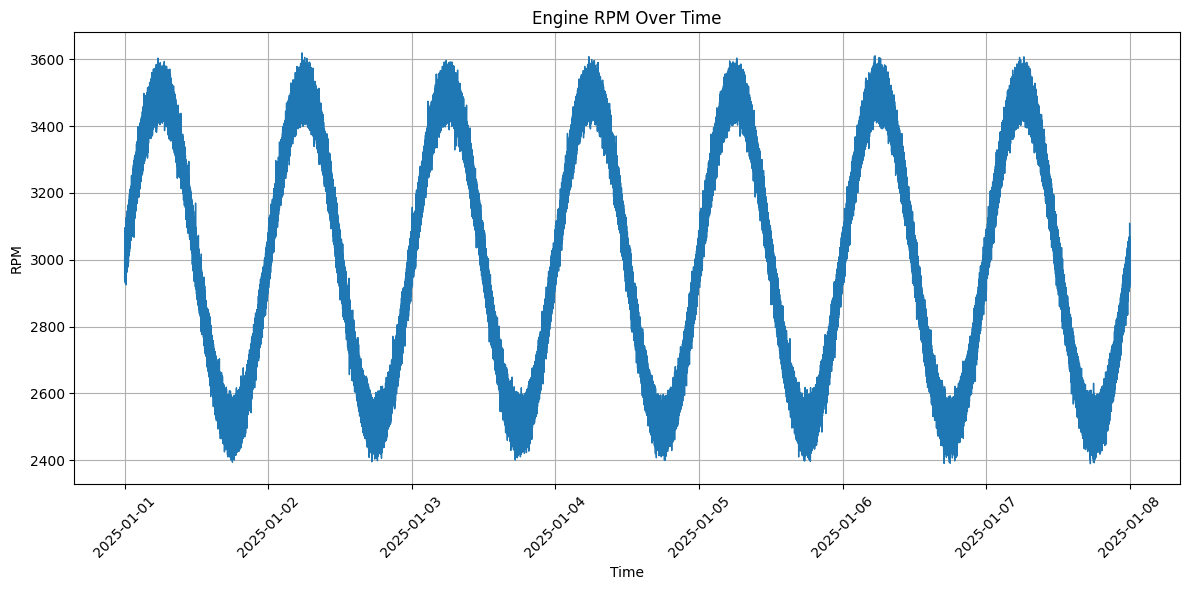

In [10]:
# Create a line plot of RPM over time using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_rpm['Period'], df_rpm['RPM'], linewidth=1)
plt.title('Engine RPM Over Time')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Pycaret analysis and modeling

In [11]:
from pycaret.time_series import *

In [12]:
df_rpm.shape

(604800, 2)

In [13]:
df_rpm.shape[0] *0.1

60480.0

In [14]:
test_shape = int(df_rpm.shape[0] * 0.1)
test_shape

60480

In [15]:
rpm_s = setup(data=df_rpm, target='RPM', session_id=123, fh=test_shape)

,Description,Value
0,session_id,123
1,Target,RPM
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(604800, 2)"
5,Transformed data shape,"(604800, 2)"
6,Transformed train set shape,"(544320, 2)"
7,Transformed test set shape,"(60480, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [16]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
rpm_exp = TSForecastingExperiment()

In [17]:
type(rpm_exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [18]:
rpm_exp.setup(data=df_rpm, target='RPM', session_id=123, fh=test_shape)

,Description,Value
0,session_id,123
1,Target,RPM
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(604800, 2)"
5,Transformed data shape,"(604800, 2)"
6,Transformed train set shape,"(544320, 2)"
7,Transformed test set shape,"(60480, 2)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [17]:
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,172800.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,3000.119874
3,Summary,Statistics,Transformed,Median,,3000.616764
4,Summary,Statistics,Transformed,Standard Deviation,,367.33412
5,Summary,Statistics,Transformed,Variance,,134934.355399
6,Summary,Statistics,Transformed,Kurtosis,,-1.286909
7,Summary,Statistics,Transformed,Skewness,,-0.000757
8,Summary,Statistics,Transformed,# Distinct Values,,172800.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",3542313.045313


In [18]:
# get best model 
rpm_best_model  = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,2.8787,2.5977,325.5205,368.1289,0.1104,0.1091,-0.0015,0.1267


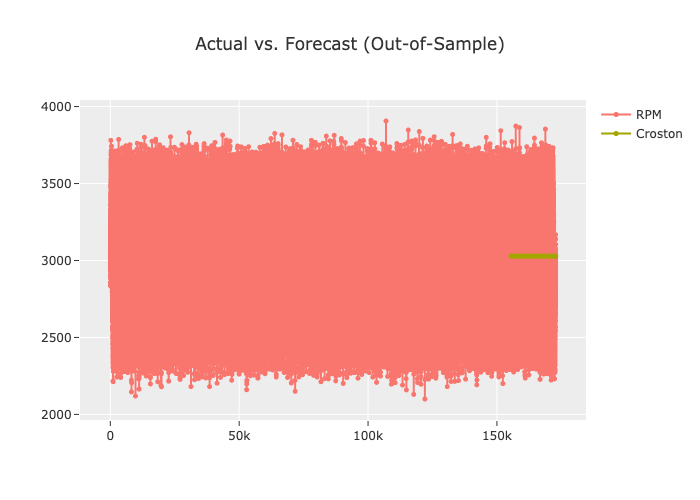

In [19]:
# model forecast
plot_model(rpm_best_model, plot='forecast')

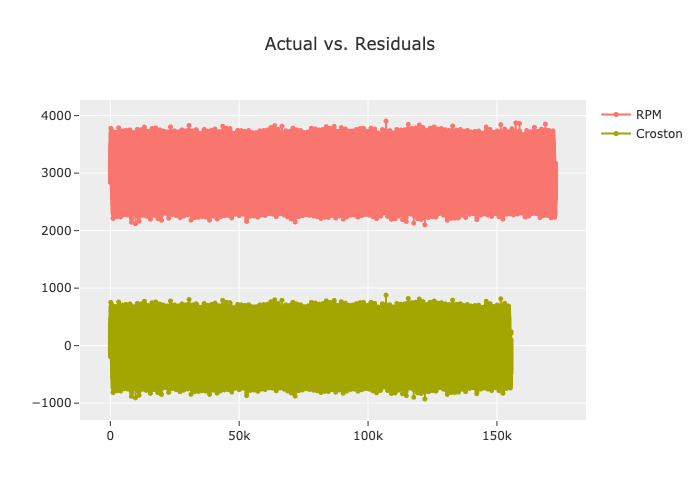

In [20]:
plot_model(rpm_best_model, plot='residuals')